In [1]:
from IsingModel import IsingModel

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [25]:
# create histogram
N=20
model = IsingModel(
    N,
    J=1,
    T=2,
    sampling_method='metropolis',
    boundary_condition='helical'
)

model_uniform = IsingModel(
    N, 
    J=1, 
    T=2, 
    boundary_condition='helical', 
    sampling_method='uniform'
)

sample_size = 100*20*20+10000
energies_metropolis = np.zeros(sample_size)
energies_uniform = np.zeros(sample_size)
spins = model.initialize_spins()
spins_uniform = model_uniform.initialize_spins()

for k in range(sample_size):
    E = model.calculate_energy(spins)
    E_uniform = model.calculate_energy(spins)
    spins = model.metropolis_step(spins)
    spins_uniform = model_uniform.metropolis_step(spins_uniform)
    energies_metropolis[k] = E
    energies_uniform[k] = E_uniform
print('metropolis done')

metropolis done


In [24]:
print(energies_metropolis)

[   8.    4.    0. ... -700. -700. -700.]


In [17]:
E_bins, E_bin_edges = np.histogram(energies_metropolis[100*20*20:], bins=50, density=True)
E_bin_center= (E_bin_edges[:-1] + E_bin_edges[1:]) / 2

In [18]:
print(E_bin_center)

[-646.76 -644.28 -641.8  -639.32 -636.84 -634.36 -631.88 -629.4  -626.92
 -624.44 -621.96 -619.48 -617.   -614.52 -612.04 -609.56 -607.08 -604.6
 -602.12 -599.64 -597.16 -594.68 -592.2  -589.72 -587.24 -584.76 -582.28
 -579.8  -577.32 -574.84 -572.36 -569.88 -567.4  -564.92 -562.44 -559.96
 -557.48 -555.   -552.52 -550.04 -547.56 -545.08 -542.6  -540.12 -537.64
 -535.16 -532.68 -530.2  -527.72 -525.24]


In [19]:
print(E_bins)

[0.00052419 0.00040323 0.         0.00596774 0.00572581 0.
 0.01024194 0.         0.01262097 0.01387097 0.         0.0108871
 0.01608871 0.         0.01991935 0.         0.01681452 0.0241129
 0.         0.02108871 0.02491935 0.         0.02362903 0.
 0.0253629  0.01854839 0.         0.02600806 0.         0.0233871
 0.01399194 0.         0.01721774 0.01951613 0.         0.0103629
 0.         0.01290323 0.00854839 0.         0.00818548 0.00375
 0.         0.00528226 0.         0.00221774 0.00012097 0.
 0.00020161 0.00080645]


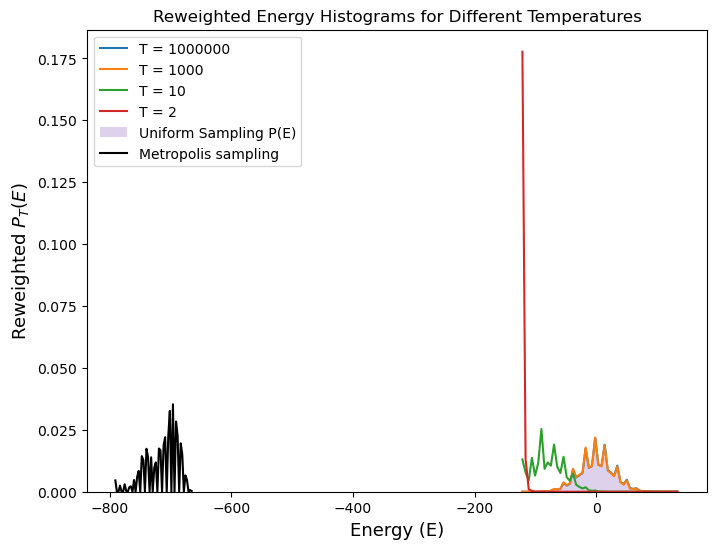

In [23]:
# Compute histogram of P(E) with 50 bins
fig, ax = plt.subplots(1,1, figsize=(8,6))

E_bins, E_bin_edges = np.histogram(energies_metropolis[100*20*20:], bins=50, density=True)
E_bin_center= (E_bin_edges[:-1] + E_bin_edges[1:]) / 2
bin_counts, bin_edges = np.histogram(energies, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Bin centers for plotting

# Define temperatures
temperatures = [10E5, 10E2, 10, 2]

# Plot P(E) for each temperature
for T in temperatures:
    # Reweight the histogram: P_T(E) = exp(-E/T) * P(E)
    P_T = np.exp(-bin_centers / T) * bin_counts
    P_T /= np.sum(P_T * np.diff(bin_edges))  # Normalize

    ax.plot(bin_centers, P_T, label=f"T = {int(T)}")

# Original uniform sampling histogram
ax.hist(energies, bins=50, density=True, alpha=0.3, label="Uniform Sampling P(E)")
ax.plot(E_bin_center, E_bins, color='black', label='Metropolis sampling')
# Add labels and legend
ax.set_xlabel("Energy (E)", fontsize=13)
ax.set_ylabel(r"Reweighted $P_T(E)$", fontsize=13)
ax.set_title("Reweighted Energy Histograms for Different Temperatures")
ax.legend()
fig.savefig('Plots/ex8_reweighting.png', dpi=300)
plt.show()